## quels sont les variables les plus pertinants de notre base

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
df.CHAS = df.CHAS.astype("category")
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

on veut passer de 14 variables a moins 10 variables pour notre modele

appliquons les different methode de selection et optons celle qui est plus adaptée a notre base

##  1- methode basique 

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

In [16]:
# maintenant je peux appliquer mon labelencoder sur ma base/ sa concerne la variable quali je remplace chaque modalité par une valeur numerique et 
# ma variable devient ainsi quanti et donc je peuc calculer la variance

df_encoded = df.copy()
df_encoded["CHAS"] = LabelEncoder().fit_transform(df_encoded["CHAS"])

In [19]:
df_encoded

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [21]:
# maintenant que ma variable quali a ete numerisée on peut maintenant fitrer les variables constant , cad avec variance = 0
#thresshold = 0 on choisit le seuil 0 et on l'applique sur sur ma base avec fit

# VarianceThreshold c'est un filtre qui selectionnne les variables avec un variance superieur  a un seuil donnée

constant_filter = VarianceThreshold( threshold = 0)

constant_filter.fit(df_encoded)


VarianceThreshold(threshold=0)

In [25]:
# now je peux analyser le nombre de variables avant et apres le filtrage, pour voir si il y'a des suppression a faire

print(f"Nombre de variables avant le filtrage: {df_encoded.shape[1]}")
print(f"Nombre de variables apres le filtrage: {sum(constant_filter.get_support())}")

# sum(...) = je te donne le nombre total de variable qui ont passé le test/ cad ces variable qui ont ne variance constante
# constant_filter.get_support() = renvoie moi un tableau booleen, indiaquant quel variables ont ete selectionnees apres avoir appliquer un filtre a  ma 
# base

Nombre de variables avant le filtrage: 14
Nombre de variables apres le filtrage: 14


In [27]:
# voyons si on a les variables quasi-constant avec le seuil = 0.01

constant_filter = VarianceThreshold( threshold = 0.01)
constant_filter.fit(df_encoded)

VarianceThreshold(threshold=0.01)

In [31]:
print(f"Nombre de variables avant le filtrage: {df_encoded.shape[1]}")
print(f"Nombre de variables apres le filtrage: {sum(constant_filter.get_support())}")

Nombre de variables avant le filtrage: 14
Nombre de variables apres le filtrage: 14


conclusion: sur ma base il y'a pas de variables constante ou quasi_contant qu'on peut supprimer, car on a le meme nombe de variable avant et apres  filtrage 14. on voit donc que cette methode n'est pas adapté a notre base, on va donc utiliser d'autre methode

## 2- methode par filtrage

consiste a faire des TEST STATISTIQUE UNIVARIE en fonction de la nature de la variable et choisir les variables les plus pertinente

sa peut etre lourd et fastidieux si on a plus de 100, 1000 variables, si il faut le faire pour chaque variable sa ne suis pas..
raison pour la laquelle on a :

- la REGRESSION LINEAIRE UNIVARIE / ou la SELECTION des meilleurs variables avec SELECTKBEST = qui me selectione les  K meilleurs variables pertinante quali et quanti suivant un critère


inconveniant avec selectkbest= on peut avoir des variables très corrélées meme si elles sont meilleurs en general

raison pour laquelle on a d'autre methodes



notre variable cible (MEDV) etant  quantitative , on doit plutot analyser la correlation entre ma variable cicble et toute les autres variables et choisir la variable la plus correlée

mettons en place une fonction qu'on pourra utiliser dans tous nos modele, qui me fera tous ces etapes
. calcul de la corelation entre les variables
. j'identifie, les variables qui sont fortement correlées entre elles
. de ces variables fortement corrélées entre elles, je choisit uniquement les variables très correlé a ma variables cible
. et je fais la classificatiion de mes variables

In [34]:
var_quanti = df.select_dtypes(include = "number")
var_quanti

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [50]:
import matplotlib.pyplot as plt


def correlation (dataset, cible, seuil):
    """
    la fonction a pour seuil = 80% seuil generalement utilisé. c'est le niveau au dela duquel on considère qu'une correlation est très forte donc il y'a 
    redondance

    de ces variables fortement correlées entre elles, sa choisit les variables correle a la cible. elle genere egalement un graphique de correlation 
    entre les variables et la cible

    retourne: l'ensemble contenanr le nom des variables très correlées entre elles( au dessus de la seuil donnée) et qui ne sont pas corrélé a la
    variable cible
    """

    var_quanti = df.select_dtypes(include = "number")
    
    # on cree un ensembles vide qui va contenir le nom des variables fortement corrélées entre elles, mais pas fortement corrélées avec ma variable cible
    # donc a supprimer
    # on utilise un set plutot qu'une liste pour eviter les doublons
    
    col_corr = set()
    
    # je cree la matrice de correlation pour toutes les variables de ma base
    
    corr_matrix = var_quanti.corr()
    
    for i in range(len(corr_matrix.columns)):
        
        # boucle interne: je parcour les ligne precedente de la colonne courante, parcouranr ainsi leje prend en compte juste la partie inferieur gauche
        # de la matrice pour eviter de calculer la meme matrice plusieur fois(car la correlation entre x et y est la meme que y et x)
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > seuil:
                
                # on attribue les noms aux 2 variables qui sont fortement corrélées
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                
                # on verifie lequel des 2 variables qui sont fortement correlées entre elles est plus fortement corrélé avec la variable cible
                if abs(corr_matrix.loc[colname1, cible]) > abs(corr_matrix.loc[colname2 , cible]):
                    
                    # je supprime la variable colname2
                    col_corr.add(colname2)
                else:
                    col_corr.add(colname1)

    # on selection la colonne cible de la matrix de correlation on enleve la correlation de la cicble avec elle meme(qui est tjr 1) puis on prend la 
    #valeurs
    # absolue de ses correlation
    corr_with_target = corr_matrix[cible].drop(labels = [cible]).abs()
    
    # trier les correlation pas ordre decroissant, cela permet de visualiser les variables les plus fortement corrélées a la cible
    sorted_corr = corr_with_target.sort_values(ascending = False)
    
    # je met en place le graphique qui va  mettre les variables les plus corrélées à la cible, du plus grand au plus petit
    plt.figure(figsize = (10, 8))
    sorted_corr.plot(kind = "bar")
    plt.title(f"la correlation des variables avec la {cible}")
    plt.xlabel("Variables")
    plt.ylabel("Valeurs de la correlation absolue")
    plt.show()

    
    return (col_corr)

                

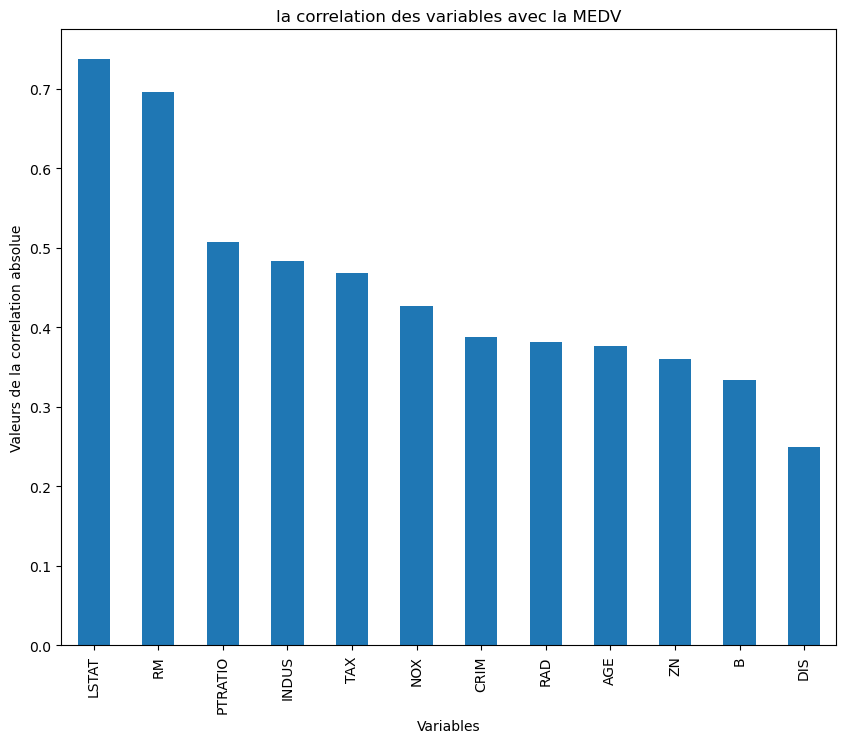

{'RAD'}

In [52]:
correlation(var_quanti, "MEDV", 0.8)

on a donc les variables classe par ordre d'importance/pertinence pour mon modeLe, du plus grand au plus petit

importance=  est signe de forte corelation avec ma variable cible, ayant ainsi un impact sur celle ci

1° technique de choix: choisir a partir d'une regle de code, conserver les 5 ou 10 premier et supprimer volontairement le reste

tout depend aussi les ARBRES DE DECISION/ FORET ALEATOIRE/ MODELE DE BOOSTING ( gere plus facilement la pb de MULTICOLINEARITé, dans ce cas garder les variables correlees entre elles et pas correlée a ma variable cicle ne sera pas forcement problematique

par contre MODELE DE REGRESSION LINEAIRE( qui ne gere pas facilement le pb de MULTICOLINEARITE, dans ce cas sa peut etre problematique)

on a aussi la variable quali qui peut etre très pertinent pour mon modele

# selection des  variables quanti et quali les plus pertinant silutanement sans metre en place 2 analyses

## pour cela on a la regression lineaire univariée

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

x = df.drop(columns = ["MEDV"])
y = df["MEDV"]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [70]:
# Encoder les variables catégorielles
# get_dummies qui permet de transformer les variables quali en plusieurs modalitée.  pour chaque maodalité de ma variable j'artribue autre 2 modalite
# vrai ou faux. c'est necessaire pour mettre en place un modele de regression univarié
x = pd.get_dummies(x, drop_first=True)
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,False
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,False
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,False
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,False
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,False
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,False
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,False


In [80]:
# standrtiser mes donnees( cest facultatif, mais recomandé pour certain modele)scaler = StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)


In [82]:
# appliquer le selectbest pour selctioner les meilleurs variables
# ici nous utilisons f_regression qui est adapté pour les probleme de regression

selector = SelectKBest(score_func = f_regression, k = "all")
x_selector = selector.fit_transform(x_scaler, y)

In [84]:
# afficher le scores des variables par ordrew croisant
feature_scores = pd.DataFrame({ "features": x.columns, "score":selector.scores_} )
feature_scores = feature_scores.sort_values(by = "score", ascending = False)
feature_scores

,features,score
11,LSTAT,601.617871
4,RM,471.846740
9,PTRATIO,175.105543
2,INDUS,153.954883
8,TAX,141.761357
3,NOX,112.591480
0,CRIM,89.486115
7,RAD,85.914278
5,AGE,83.477459
1,ZN,75.257642


In [94]:
# la j'ai le score de score de tous mes 13 variables ,  on peut reduire k pour choisir le top des variables avec le meilleur score
#  par exemples pour choir 5 meilleur variables

selector = SelectKBest(score_func = f_regression, k = 5)
x_selector = selector.fit_transform(x_scaler, y)

feature_scores_selected = pd.DataFrame({"features": x.columns, "score": selector.scores_})
feature_scores_selected= feature_scores_selected.sort_values(by = "score", ascending = False)
feature_scores_selected

,features,score
11,LSTAT,601.617871
4,RM,471.846740
9,PTRATIO,175.105543
2,INDUS,153.954883
8,TAX,141.761357
3,NOX,112.591480
0,CRIM,89.486115
7,RAD,85.914278
5,AGE,83.477459
1,ZN,75.257642


In [96]:
# afficher la liste de mes 5 meilleurs variables sectionnées
selected_features = x.columns[selector.get_support()]
print("les variables selectionnées sont:")
selected_features

les variables selectionnées sont:


Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

inconveniant de la methode par filtrage: sa analyse le lien avec la cible sans tout fois considerer l'interation entre les variables

## 3- methode par enveloppement

qui sont les selections automatique des variables pertinantes...

## 4- methodes integrées

avec sa on met sur pied le modèle et le modele choisir lui meme les meilleurs variables
- se sont des modèles mathematique qui permet de choisir automatiquement les variables sans avoir besoin de faire une Selection

###  1° methode intégrée: regression lasso

### 2° methode intégrée: modele d'arbre de decision ou forest aleatoire 

attention: c'est très important dans cette fase de selection de variable, de mettre sur un des modeles plus complexes pour etre sur de l'importance de nos variables selecionnées

In [126]:
# forest aleatoire

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

x = df.drop( columns = "MEDV")
y = df["MEDV"]

In [121]:
x = pd.get_dummies(x, drop_first = True)
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,False
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,False
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,False
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,False
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,False
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,False
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,False


In [123]:
# standartiser les donnees
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# appliquer le modele de random forert
# random_state = 42 pour fixer la graine, car l'algotithme de maching learnng utilise, très souvent des processus aleatoire: ex: selection aleatoire  
# des echantillons, en fixant la graine donc on s'assure d'avoir les mee resultats a chaque execution

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
x_rf = rf.fit(x_scaled, y)

# afficher les importance de mes variables
importances = pd.DataFrame({"features": x.columns, "importances": rf.feature_importances_})
importances = importances.sort_values(by = "importances", ascending = False)
importances
                           

,features,importances
11,LSTAT,0.449863
4,RM,0.362204
6,DIS,0.064387
0,CRIM,0.034490
3,NOX,0.020359
9,PTRATIO,0.016544
5,AGE,0.014507
8,TAX,0.014441
10,B,0.011200
2,INDUS,0.005196


note: on constate que la variable DIS:( distance ponterée entre la maison et les 5 centres d'emploi de boston) est classer comme 3° variable plus important via le modele de forest aleatoire 
par contre avec la methode par filtrage il etait classe dernier

ceci arrive parce que: l'incovenient de la methode par filtrage c'est qu'il analyse le lien aves la cible sa toute fois considerer l'interaction entre les variables
or on sait que le fait d'avoir une variables tres correlees a une autre peut impacter positivement ou negativement son importance

contrairerement à la methode par filtrage ,  la foret aleatoire gère mieux le probleme de multcolinearité

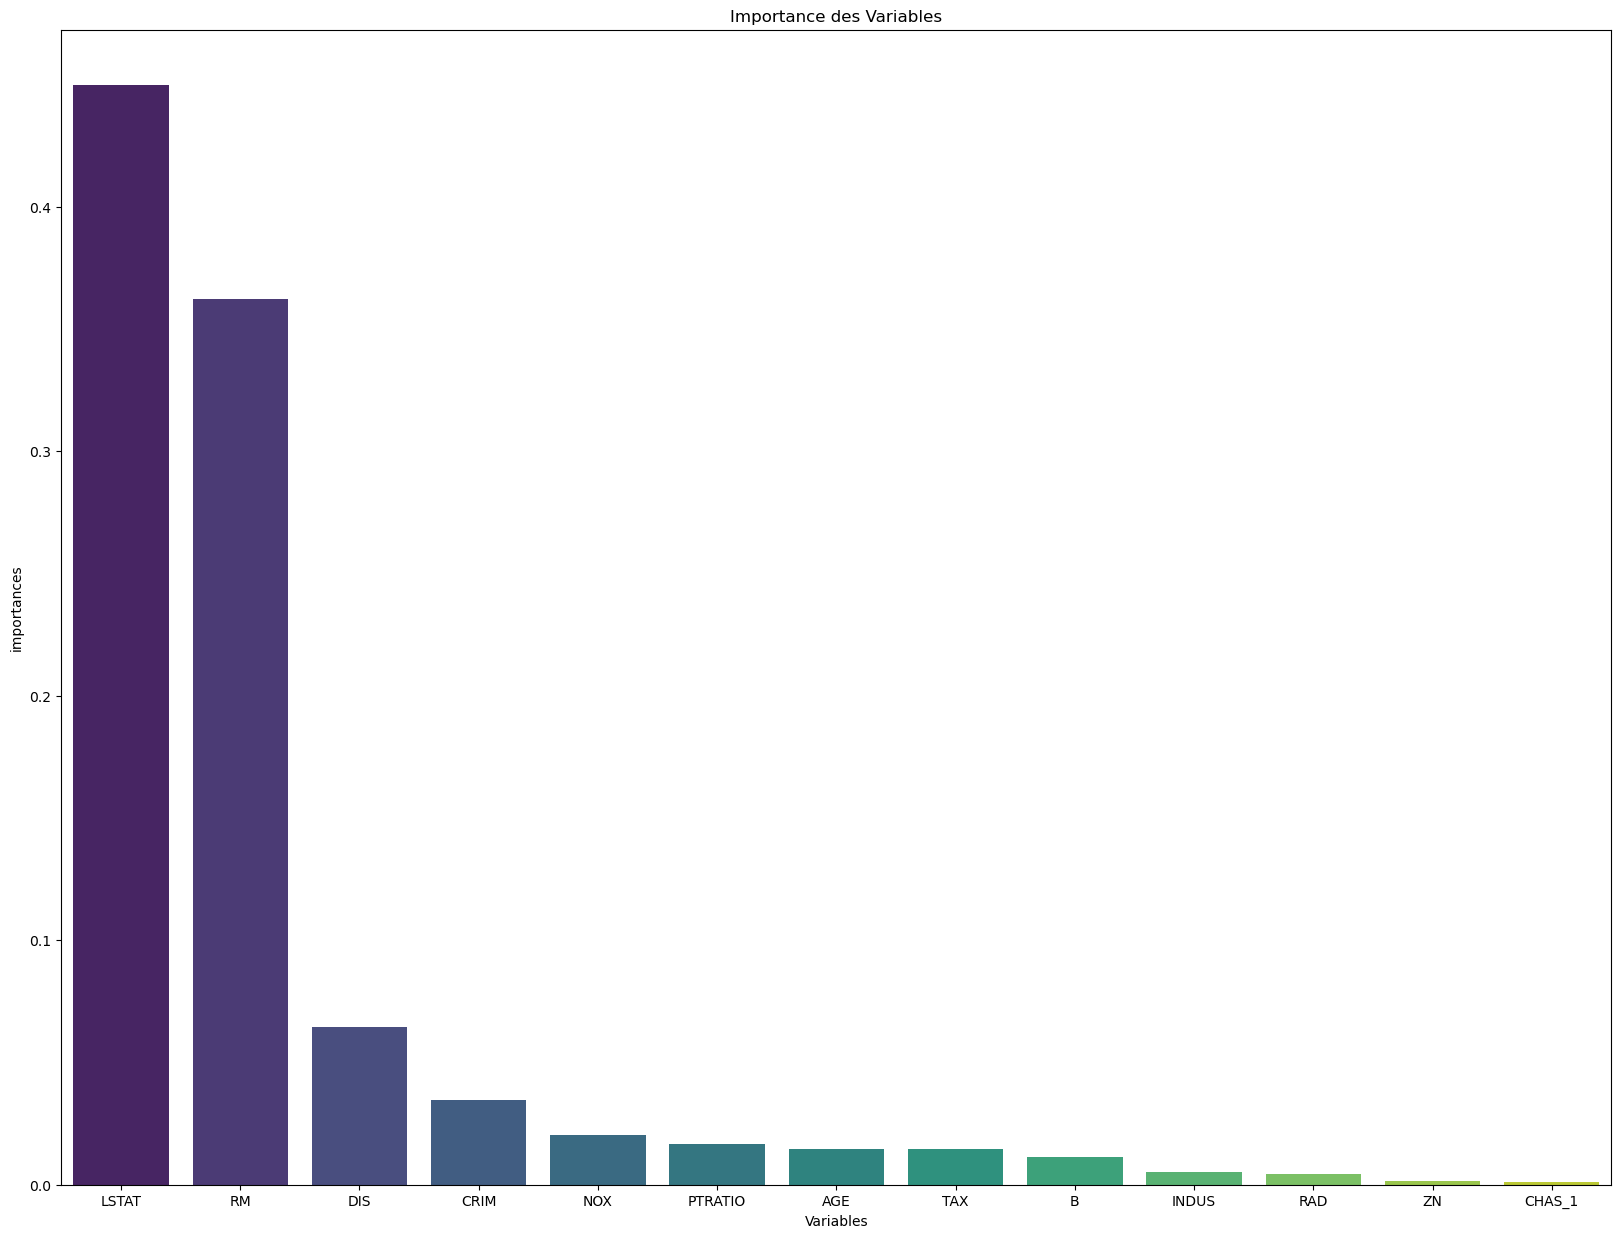

In [136]:
# creer un graphique pour mieux visualiser l'importance des variables

plt.figure(figsize = (20, 15))
sns.barplot(x = "features", y= "importances", data = importances, palette = "viridis")
plt.title("Importance des Variables")
plt.xlabel("Variables")
plt.ylabel("importances")
plt.show()

mon  modele m'a fourni ainsi tous mes variables en terme d'importance et via la regle de code, je choisit les k meilleurs

moi je choisi les 10 premiers

puis je  fais ma regression lineaire avec tous les 10, et je reduire au fur a mesure jusqu'a avoir le niveau de performance que je veux

pour reduire , je me base sur le VIF et le degré d'importance

et d'un point de vu reel tout en fesant intervenir les metier, c'est assez logique